# Zestaw 4. Kwadratury 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

## 1. Kwadratury elementarne
Napisz funkcję, która policzy prostą, zamkniętą kwadraturę Simpsona

In [56]:
def simpson_quadrature(points, f):
    h = points[1] - points[0]
    middle = (points[0] + points[1])/2
    return h*(f(points[0]) + 4*f(middle) + f(points[1]))/6

a. Przetestuj jej działanie na jednomianach kolejnych stopni, nie większych niż 5
poprzez porównanie wyników z wartościami analitycznymi. Opisz wyniki.

In [57]:
def test_simpson():
    def monomial(i):
        return lambda x: x**i
    
    for i in range(6):
        simpson = simpson_quadrature([0, 1], monomial(i))
        actual = 1/(i+1)*monomial(i+1)(1)
        print(f"x^{i}: expected: {actual}, got: {simpson}")

In [58]:
test_simpson()

x^0: expected: 1.0, got: 1.0
x^1: expected: 0.5, got: 0.5
x^2: expected: 0.3333333333333333, got: 0.3333333333333333
x^3: expected: 0.25, got: 0.25
x^4: expected: 0.2, got: 0.20833333333333334
x^5: expected: 0.16666666666666666, got: 0.1875


b. Przetestuj jej działanie na funkcji $f(x) = e^{−3x} sin(4x)$ na przedziale x ∈ [0, 5]
poprzez wyliczenie jej wartości na całym przedziale, a następnie porównanie z sumą
metody na dwóch podprzedziałach [0, 1] i [1, 5]. Czemu wyniki się różnią?

In [59]:
f = lambda x: np.e**(-3*x)*np.sin(4*x)
print("[0,        5] ->", simpson_quadrature([0, 5], f))
print("[0,1] + [1,5] ->", simpson_quadrature([0, 1], f) + simpson_quadrature([1, 5], f))

[0,        5] -> -0.0010027325181523326
[0,1] + [1,5] -> 0.10368557622593555


c. Zaprezentuj na wykresie funkcję f oraz kwadratowy wielomian interpolujący ją w
węzłach będących końcami przedziału i jego środkiem. Oblicz kwadraturę wyliczonego w ten sposób wielomianu i porównaj wyniki. W jaki sposób ten wielomian
jest powiązany z metodą Simpsona?

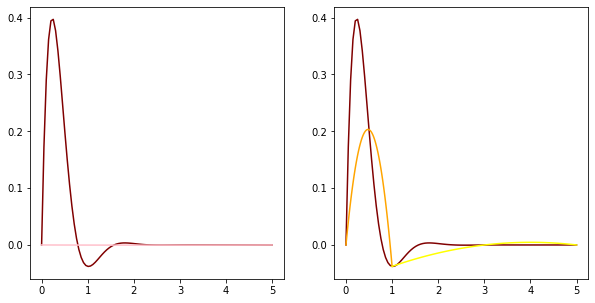

In [60]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

x_axis = np.linspace(0, 5, 100)
ax[0].plot(x_axis, f(x_axis), color='maroon')
ax[1].plot(x_axis, f(x_axis), color='maroon')

interpolation_0_5 = scipy.interpolate.interp1d([0, 2.5, 5], list(map(f, [0, 2.5, 5])), kind='quadratic')
ax[0].plot(x_axis, interpolation_0_5(x_axis), color="pink")

x_axis_0_1 = np.linspace(0, 1, 100)
interpolation_0_1 = scipy.interpolate.interp1d([0, 0.5, 1], list(map(f, [0, 0.5, 1])), kind='quadratic')
ax[1].plot(x_axis_0_1, interpolation_0_1(x_axis_0_1), color="orange")

x_axis_1_5 = np.linspace(1, 5, 100)
interpolation_1_5 = scipy.interpolate.interp1d([1, 3, 5], list(map(f, [1, 3, 5])), kind='quadratic')
ax[1].plot(x_axis_1_5, interpolation_1_5(x_axis_1_5), color="yellow")

plt.show()

## 2. Kwadratury adaptacyjne
Zaimplementuj adaptacyjną kwadraturę Simpsona. Dla kilku różnych dokładności ε wykonaj poniższe polecenia.

a. Przetestuj ją na funkcji f z zadania 1.b i porównaj wyniki z elementarną metodą
Simpsona

b. Zaprezentuj na wykresie funkcję f oraz punkty podziału wyliczone przez metodę
adaptacyjną. Opisz wyniki.

## 3. Wielomiany ortogonalne
Korzystając z modułu numpy.poly1d zaimplementuj wielomiany Legendre’a zdefiniowane w następujący sposób: <br>
P0(x) = 1
P1(x) = x
Pk+1(x) = 2k + 1/k + 1*x*Pk(x) − k/k + 1*Pk−1(x)

In [88]:
def legendre_poly(k):
    p1 = np.poly1d([1])
    p2 = np.poly1d([1,0])
    yield p1
    yield p2
    for k in range(2, k+1):
        p2, p1 = (2*k-1)/k*np.poly1d([1,0])*p2 - (k-1)/k*p1, p2
        yield p2

In [89]:
for x in legendre_poly(5):
    print(x)

 
1
 
1 x
     2
1.5 x - 0.5
     3
2.5 x - 1.5 x
       4        2
4.375 x - 3.75 x + 0.375
       5        3
7.875 x - 8.75 x + 1.875 x


a. Zaprezentuj je na wykresie na przedziale x ∈ [−1, 1]

In [92]:
def plot_legendre(k):
    fig, ax = plt.subplots()
    x_axis = np.linspace(-1, 1, 50)
    for f in legendre_poly(k):
        ax.plot(x_axis, f(x_axis))

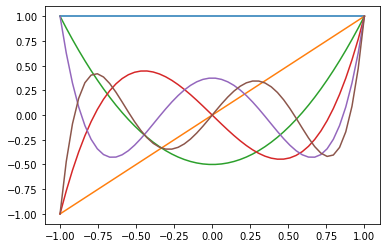

In [93]:
plot_legendre(5)

b. Sprawdź, że ich miejsca zerowe (wykorzystując pole numpy.poly1d.r) są odciętymi punktów Gaussa (scipy.special.roots legendre). Test wykonaj dla wielomianów od 2 do 4 stopnia.

c. Podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

## 4.

In [94]:
# ze wzoru ze screena

## 5.